# Practical Work 6 - Logistic Regression

## Students
- Flavia Pittet
- Fabio Vitali


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ex 1 - Classification to predict student admission

### a. Logistic regression classifier with linear decision boundary

- In a similar way as for the exercise of the previous week, read the training data from file student-dataset-train.csv. The first two columns are x1 and x2. The last column holds the class label y. Build the design matrix X Check that the shape of X is (100,3) and that the shape of y is (100,).

In [2]:
trainSet = pd.read_csv("student-dataset-train.csv", header=None)
testSet = pd.read_csv("student-dataset-test.csv", header=None)

In [3]:
X0 = trainSet[0].values
X1 = trainSet[1].values
Y = trainSet[2].values

X = np.ones((X0.size, 3))
X.T[1] = X0
X.T[2] = X1
print("shape: ",X.shape, Y.shape)

shape:  (100, 3) (100,)


- Implement a z-norm normalization of the training set. You need to store the normalization values (µ, σ) for later as they will be needed to normalize the test set.

In [4]:
X0_avg = X0.mean()
X0_std = X0.std()
X1_avg = X1.mean()
X1_std = X1.std()

X0_norm = (X0 - X0_avg) / X0_std
X1_norm = (X1 - X1_avg) / X1_std

X_norm = np.ones_like(X)
X_norm.T[1] = X0_norm
X_norm.T[2] = X1_norm

- Implement a sigmoid function g(z) and plot it

In [5]:
def g(z):
    return 1/(1+np.exp(-z))

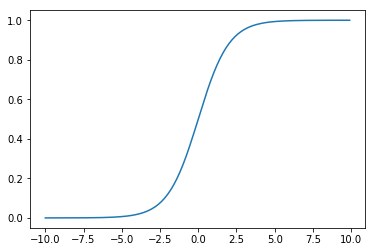

In [6]:
plt.plot(np.arange(-10,10,0.1), g(np.arange(-10,10,0.1)))

- Implement the hypothesis function h(x)

In [7]:
def hypothesis(X,theta):
    return g(X.dot(theta.T))  

- Implement the objective function J

In [8]:
def objective(X,y,theta):
    epsilon = 1e-6
    h = hypothesis(X,theta) 
    N = X.shape[0]
    tmp = y * np.log(h + epsilon) + (1-y) * np.log(1 - h + epsilon)
    return tmp.sum()/N

- Implement the gradient ascent

In [9]:
def gradientAscent(X,y, learning_rate, num_epoch):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.zeros(D)  # init thetas to some values
    
    J = []
    for i in range(0,num_epoch):
        h = hypothesis(X, theta)  #N dimension
        loss = y-h                    #N dimension
        gradient = X.T.dot(loss)
        theta = theta + learning_rate * (1.0/N) * gradient
        J.append(objective(X,y, theta))
    return theta, np.array(J)

- Test your implementation and plot the evolution of the cost J

In [10]:
theta, J = gradientAscent(X,Y, 1e-3, 2000000)

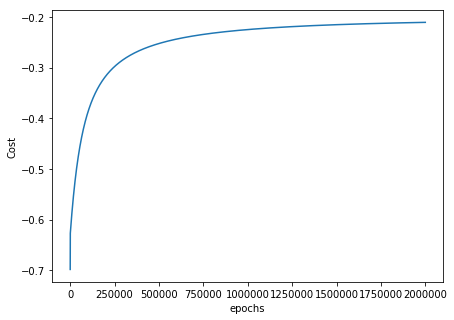

In [11]:
plt.figure(figsize=(7,5))
plt.xlabel("epochs")
plt.ylabel("Cost")
plt.plot(J)

In [12]:
# Test with the training set
test = hypothesis(X, theta)
correct = 0
for yc, y in zip(test.round(),Y):
    if yc == y:
        correct += 1
        
print(correct, len(test) - correct)

89 11
